In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/inform_unidas.csv')

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

### RESUMO DA TABELA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigo_cliente         2990 non-null   int64  
 1   codigo_produto         2990 non-null   int64  
 2   qtd_produto_compra     2990 non-null   int64  
 3   valor_produto          2990 non-null   float64
 4   valor_total_compra     2990 non-null   float64
 5   nome_produto           2990 non-null   object 
 6   cod_class_produt       2990 non-null   int64  
 7   nome_class_produt      2990 non-null   object 
 8   cliente_genero         2990 non-null   int64  
 9   cliente_idade          2990 non-null   int64  
 10  cliente_qtd_filhos     2990 non-null   int64  
 11  cliente_estado_civil   2990 non-null   int64  
 12  codigo_estado_cliente  2990 non-null   int64  
 13  cliente_hipertenso     2990 non-null   int64  
 14  cliente_diabetes       2990 non-null   int64  
 15  nome

### 2. Qual é o desvio padrão dos valores de produtos do dataset de produtos cuja classe do alimento é bebidas?

In [ ]:
df.loc[df.nome_class_produt == "Bebidas",'valor_produto'].std()

1.6376843439326545

### 3.Construa um histograma de distribuição das idades dos clientes do gênero masculino. Gera um gráfico com 20 barras. 

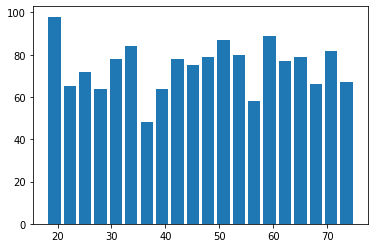

In [ ]:
df_h = df.loc[df.cliente_genero == 1]
plt.hist(df_h.cliente_idade,20,rwidth=0.8)
plt.show()

### 4.Crie um novo dataframe a partir  de compras_clientes com as colunas de idade e valor total da compra. Calcule o WCSS para esses dados e responda: Qual o valor de WCSS para o primeiro cluster?

In [ ]:
df_cluster = df.loc[:,['cliente_idade','valor_total_compra']]
km = KMeans(n_clusters= 1,random_state=0)
km.fit(df_cluster)
print(km.inertia_)


3594146.3889058568


### 5. Qual a proporção de homens e mulheres hipertensos que compraram produtos da classe "Alimentação"?

In [ ]:
df_resp = df.loc[df.cliente_hipertenso==1]
df_resp = df_resp.loc[df_resp.nome_class_produt == "Alimentação"]
df_resp_h = 100*len(df_resp.loc[df.cliente_genero==1])/len(df_resp)
df_resp_m = 100*len(df_resp.loc[df.cliente_genero==0])/len(df_resp)
print("Homem: {} Mulher: {}".format(df_resp_h,df_resp_m))

Homem: 50.479846449136275 Mulher: 49.520153550863725


### 6. Gere o gráfico de análise de clusters com os centroides

In [ ]:
df_cluster = df.loc[:,['cliente_idade','valor_total_compra']] #cria o df
km = KMeans(n_clusters= 4,random_state=0) #cria o algoritmo
df_cluster['cluster'] = km.fit_predict(df_cluster)#aplica o algoritmo de cluster
centroid = km.cluster_centers_ #pega os centroids

1. plotar o gráfico

In [ ]:
grafico = px.scatter(x=df_cluster['cliente_idade'],y=df_cluster['valor_total_compra'],color=df_cluster['cluster'])
grafico_c = px.scatter(x=centroid[:,0],y=centroid[:,1],size=[1,1,1,1])
gr = go.Figure(data = grafico_c.data + grafico.data)
gr.show()

### 7. Após aplicar o algoritmo de agrupamento, gere uma estatística com describe da variável valor total compra agrupando os resultados por cluster

In [ ]:
df_cluster.groupby('cluster')['valor_total_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1360.0,13.998213,10.263399,1.25,6.00,11.96,17.9800,50.00
1,54.0,186.031296,38.863936,138.00,140.00,194.97,219.7125,259.96
2,1368.0,13.052661,9.451013,1.25,5.99,11.00,17.6700,48.00
3,208.0,78.078125,24.235610,45.00,56.99,69.00,90.0000,129.98


### GERANDO CLUSTER TOTAL PARA AS OUTRAS QUESTÕES

In [ ]:
df_cluster = df.loc[:,['cliente_idade','valor_total_compra']] #cria o df
km = KMeans(n_clusters= 4,random_state=0) #cria o algoritmo
df['cluster'] = km.fit_predict(df_cluster)#aplica o algoritmo de cluster

### 8. Apresente o resultado do diagrama de boxplot entre as variáveis quantidade de filhos e cluster.

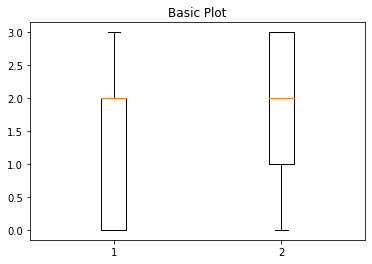

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
data = [df['cluster'],df['cliente_qtd_filhos']]
ax1.boxplot(data)
plt.show()

### 9. Quantidade de solteiros e hipertensos estão presentes no cluster de identificador 3?

In [ ]:
df_cluster = df.loc[:,['cliente_idade','valor_total_compra']] #cria o df
km = KMeans(n_clusters= 4,random_state=0) #cria o algoritmo
df_cluster['cluster'] = km.fit_predict(df_cluster)#aplica o algoritmo de cluster)
df["cluster"] = df_cluster["cluster"]

In [ ]:
df_resp = df.loc[df.cluster==3]
df_resp = df_resp.loc[df.cliente_hipertenso==1]
df_resp = df_resp.loc[df.cliente_estado_civil==0]
len(df_resp)

28

### 10. Qual é o número total de diabéticos para o cluster de identificador 0?

In [ ]:
df_cluster = df.loc[:,['cliente_idade','valor_total_compra']] #cria o df
km = KMeans(n_clusters= 4,random_state=0) #cria o algoritmo
df['cluster_2'] = km.fit_predict(df_cluster)#aplica o algoritmo de cluster)

In [ ]:
#df_resp = df.loc[df.cliente_genero == 1]
df_resp = df.loc[:]
df_resp = df_resp.loc[df_resp.cluster_2==0]
df_resp = df_resp.loc[df_resp.cliente_diabetes==1]
len(df_resp)

704